<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Tutorials/Working_on_anndata_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section installs the required packages for the tutorial. It downloads and unzips a file, and then installs the pympler and Pseudovisium packages using pip.

In [ ]:
!wget https://dg1oqa.bl.files.1drv.com/y4m2CulsqPOHi88uM3y4R3bpe_E0oV-5QWcibRtQAa6_OEwaeDJp2szwSfQLHeZ9hukrY97lU2Mzzghwvm77jm3jqzjsYHWWmwcn-_lRMn7e1R1tOBrFkHba5uaoOv2yQcDobXlqrpmChbiHihhY_4uT2L3ayWbLGj-OBQIIulTUqBSMDshOXZmZhfGQfa3i3GHgzgYf6-2z0sWlKjMlQhv-w
!unzip /content/y4m2CulsqPOHi88uM3y4R3bpe_E0oV-5QWcibRtQAa6_OEwaeDJp2szwSfQLHeZ9hukrY97lU2Mzzghwvm77jm3jqzjsYHWWmwcn-_lRMn7e1R1tOBrFkHba5uaoOv2yQcDobXlqrpmChbiHihhY_4uT2L3ayWbLGj-OBQIIulTUqBSMDshOXZmZhfGQfa3i3GHgzgYf6-2z0sWlKjMlQhv-w
!pip install pympler
!pip install Pseudovisium

--2024-08-12 08:05:45--  https://dg1oqa.bl.files.1drv.com/y4m2CulsqPOHi88uM3y4R3bpe_E0oV-5QWcibRtQAa6_OEwaeDJp2szwSfQLHeZ9hukrY97lU2Mzzghwvm77jm3jqzjsYHWWmwcn-_lRMn7e1R1tOBrFkHba5uaoOv2yQcDobXlqrpmChbiHihhY_4uT2L3ayWbLGj-OBQIIulTUqBSMDshOXZmZhfGQfa3i3GHgzgYf6-2z0sWlKjMlQhv-w
Resolving dg1oqa.bl.files.1drv.com (dg1oqa.bl.files.1drv.com)... 13.107.42.12
Connecting to dg1oqa.bl.files.1drv.com (dg1oqa.bl.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2123307094 (2.0G) [application/zip]
Saving to: ‘y4m2CulsqPOHi88uM3y4R3bpe_E0oV-5QWcibRtQAa6_OEwaeDJp2szwSfQLHeZ9hukrY97lU2Mzzghwvm77jm3jqzjsYHWWmwcn-_lRMn7e1R1tOBrFkHba5uaoOv2yQcDobXlqrpmChbiHihhY_4uT2L3ayWbLGj-OBQIIulTUqBSMDshOXZmZhfGQfa3i3GHgzgYf6-2z0sWlKjMlQhv-w’

y4m2CulsqPOHi88uM3y 100%[===================>]   1.98G  29.4MB/s    in 84s     

2024-08-12 08:07:10 (24.0 MB/s) - ‘y4m2CulsqPOHi88uM3y4R3bpe_E0oV-5QWcibRtQAa6_OEwaeDJp2szwSfQLHeZ9hukrY97lU2Mzzghwvm77jm3jqzjsYHWWmwcn-_lRMn7e1

Here, we import the necessary modules, including time for measuring execution time, generate_pv from the Pseudovisium package, and asizeof from pympler for measuring memory usage. We also preview the first few lines of the input CSV file using the head command.

In [ ]:
import time
import Pseudovisium.pseudovisium_generate as pvg
from pympler import asizeof
!head "/content/pancreas/Pancreas_tx_file.csv"

fov,cell_ID,cell,x_local_px,y_local_px,x_global_px,y_global_px,z,target,CellComp
51,0,c_1_51_0,86,23,52525.0358181544,41902.4060461886,2,TRAPPC8,
51,0,c_1_51_0,85,38,52524.036799034,41887.4088662988,2,APOL1,
51,0,c_1_51_0,85,38,52524.036799034,41887.4088662988,3,APOL1,
51,0,c_1_51_0,95,45,52534.0388833222,41880.4078037332,1,NCF4,
51,0,c_1_51_0,83,56,52522.0387607934,41869.4067003248,3,MLN,
51,0,c_1_51_0,84,56,52523.0377799137,41869.4067003248,4,MLN,
51,0,c_1_51_0,40,59,52479.0373306414,41866.4056786022,7,DNAJC7,
51,0,c_1_51_0,96,59,52535.0379024425,41866.4056786022,4,HNF1A,
51,0,c_1_51_0,96,59,52535.0379024425,41866.4056786022,5,HNF1A,


This code block sets up the parameters for generating the Pseudovisium output. It specifies the input CSV file, output path, hexagon size (which can be adjusted for faster execution), batch size, technology (CosMx), number of workers, project name, and the pixel to micrometer conversion factor. The generate_pv function is then called with these parameters to generate the Pseudovisium output. The execution time is measured using time.time().

In [ ]:
import pandas as pd
def load_in_fullres(folder,ctu=0.12028):
      try:
          adata_fullres = sq.read.nanostring(
              path=folder,
              counts_file="Pancreas_exprMat_file.csv",
              meta_file="Pancreas_metadata_file.csv",
              fov_file="Pancreas_fov_positions_file.csv",
          )


      except:
          #first command -> locate to folder folder
          file= "/Pancreas_fov_positions_file.csv"
          new_file = "/Pancreas_fov_positions_new_file.csv"
          # extract the third column from the CSV file
          df = pd.read_csv(folder + file)
          #create a column fov which is same as FOV
          df["fov"]=df["FOV"]
          #make it the index
          df.set_index("fov", inplace=True)

          df.to_csv(folder + new_file, index=True)

          adata_fullres = sq.read.nanostring(
                  path=folder,
                  counts_file="Pancreas_exprMat_file.csv",
                  meta_file="Pancreas_metadata_file.csv",
                  fov_file="Pancreas_fov_positions_new_file.csv",
              )
          adata_fullres.obsm["spatial"] = adata_fullres.obs[["CenterX_global_px","CenterY_global_px"]].to_numpy()
          adata_fullres.obsm["spatial"]=adata_fullres.obsm["spatial"]*ctu

      sc.pp.calculate_qc_metrics(adata_fullres, percent_top=(50, 100, 200, 300), inplace=True)
      adata_fullres.obs["sum"]= np.array(np.sum(adata_fullres.X,axis=1)).flatten()
      return adata_fullres

Here, we import the scanpy package and load the full-resolution data using the load_in_fullres function defined earlier.


In [ ]:
import scanpy as sc
import squidpy as sq
import numpy as np
adata_fullres = load_in_fullres("/content/pancreas",ctu=0.12028)

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


This code block visualizes the spatial distribution of the sum of counts and the expression of the "INS" gene in the full-resolution data using plt.scatter. It sets the aspect ratio of the plot to be equal using plt.gca().set_aspect('equal', adjustable='box').

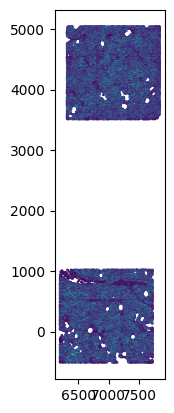

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(adata_fullres.obsm["spatial"][:,0],adata_fullres.obsm["spatial"][:,1],c=adata_fullres.obs["sum"],s=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

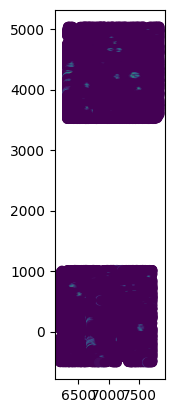

In [ ]:
#plot Insulin gene
plt.scatter(adata_fullres.obsm["spatial"][:,0],adata_fullres.obsm["spatial"][:,1],c=adata_fullres[:,"INS"].X.toarray().flatten(),cmap="viridis")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
adata_fullres

AnnData object with n_obs × n_vars = 48944 × 21731
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'X', 'version', 'Run_name', 'Run_Tissue_name', 'tissue', 'Panel', 'assay_type', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'cell', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'sum'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_fov'

In [ ]:
adata_new = pvg.spatial_binning_adata(adata_fullres,25,"hex")
adata_new

AnnData object with n_obs × n_vars = 2255 × 21731
    obs: 'n_cells'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'bin_size', 'bin_type', 'original_adata_shape'
    obsm: 'spatial'

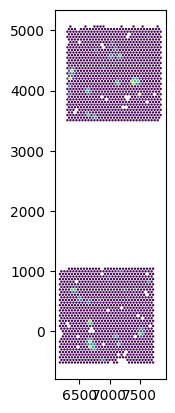

In [ ]:
#plot Insulin gene
plt.scatter(adata_new.obsm["spatial"][:,0],adata_new.obsm["spatial"][:,1],c=adata_new[:,"INS"].X.toarray().flatten(),cmap="viridis",s=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


This section prints the size of the full-resolution dataset using the asizeof function from pympler.

## Size of the full res dataset.

In [ ]:
print("Total size of the object:", adata_fullres.X.toarray().nbytes/ (1024 * 1024), "Mb")

Total size of the object: 8114.6397705078125 Mb


This section prints the size of the Pseudovisium binned dataset using the asizeof function from pympler. It demonstrates the reduced size compared to the full-resolution dataset.

## Size of the Pseudovisium binned dataset (50um bins - 2*25).

In [ ]:
print("Total size of the object:", adata_new.X.toarray().nbytes/ (1024 * 1024), "Mb")

Total size of the object: 28.68242645263672 Mb


This final section prints a list of installed packages in the environment using the subprocess module and the pip freeze command.

In [ ]:
import subprocess

# Run the pip freeze command to get a list of installed packages
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8').strip().split('\n')

print("Installed packages:")
for package in output:
    print(package)